<a href="https://colab.research.google.com/github/MayyaraHY/gomycode-etl-graph-dashboard/blob/main/etl_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import subscription file**

In [3]:
file_path = '/content/drive/MyDrive/content/Functional Task - OLTP_Subscription.csv'
df_raw = pd.read_csv(file_path)

# Preview the first few rows
df_raw.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,instructor_diploma,StudentBirthDate,professionalExperience,Industry
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2003-07-25,0,Sales
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2001-03-15,1,Research And Development
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2000-06-19,0,Research And Development
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,NaN,NaN,NaN,0,Marketing
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,NaN,NaN,1997-06-04,3,Design


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SessionName             5024 non-null   object
 1   TrackName               5024 non-null   object
 2   Hackerspace             5024 non-null   object
 3   Country                 5024 non-null   object
 4   GroupName               5024 non-null   object
 5   ProductSchedule         5024 non-null   object
 6   Student                 5024 non-null   object
 7   StudentGender           5024 non-null   object
 8   InstructorFullName      5024 non-null   object
 9   InstructorEmail         5024 non-null   object
 10  SubscriptionStartDate   5024 non-null   object
 11  SubscriptionEndDate     5024 non-null   object
 12  SubscriptionProgress    5024 non-null   object
 13  SubscriptionHasDiploma  5024 non-null   bool  
 14  DiplomaDate             3881 non-null   object
 15  inst

#**1. Data cleaning**


*   Date format


In [5]:
# Fix DiplomaDate using European format (day-first)
df_raw['DiplomaDate'] = pd.to_datetime(df_raw['DiplomaDate'], dayfirst=True, errors='coerce')

In [6]:
df_raw.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,instructor_diploma,StudentBirthDate,professionalExperience,Industry
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2003-07-25,0,Sales
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2001-03-15,1,Research And Development
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2000-06-19,0,Research And Development
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,NaT,NaN,NaN,0,Marketing
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,NaT,NaN,1997-06-04,3,Design


In [7]:
date_columns = [
    'SubscriptionStartDate',
    'SubscriptionEndDate',
    'DiplomaDate',
    'StudentBirthDate'
]

for col in date_columns:
    df_raw[col] = pd.to_datetime(df_raw[col], errors='coerce')

# Check for missing values
df_raw.isnull().sum()

,0
SessionName,0
TrackName,0
Hackerspace,0
Country,0
GroupName,0
ProductSchedule,0
Student,0
StudentGender,0
InstructorFullName,0
InstructorEmail,0




* **fill missing values**



In [8]:
# Fill missing birthdates with the most common one
most_common_birthdate = df_raw['StudentBirthDate'].mode()[0]
print(most_common_birthdate)
df_raw['StudentBirthDate'] = df_raw['StudentBirthDate'].fillna(most_common_birthdate)

1999-08-12 00:00:00


In [9]:
# check
df_raw['StudentBirthDate'].isna().sum()

np.int64(0)

In [10]:
# Fill missing diploma dates with the mode
most_common_diploma_date = df_raw['DiplomaDate'].mode()[0]
df_raw['DiplomaDate'] = df_raw['DiplomaDate'].fillna(most_common_diploma_date)
print(most_common_diploma_date)
df_raw['DiplomaDate'].isna().sum()

2024-10-06 00:00:00


np.int64(0)



*   **Drop instructor diploma column**



In [11]:
df_raw = df_raw.drop(columns=['instructor_diploma'])

* Check for missing values

In [12]:
df_raw.isnull().sum()

,0
SessionName,0
TrackName,0
Hackerspace,0
Country,0
GroupName,0
ProductSchedule,0
Student,0
StudentGender,0
InstructorFullName,0
InstructorEmail,0


* **Calculate age at subscription**

In [13]:
df_raw['age_at_subscription'] = (
    df_raw['SubscriptionStartDate'] - df_raw['StudentBirthDate']
).dt.days // 365

In [14]:
df_raw.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,StudentBirthDate,professionalExperience,Industry,age_at_subscription
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2003-07-25,0,Sales,20
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2001-03-15,1,Research And Development,22
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2000-06-19,0,Research And Development,23
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,2024-10-06,1999-08-12,0,Marketing,24
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,2024-10-06,1997-06-04,3,Design,26


**Save data set after cleaning**

In [15]:
df_cleaned = df_raw.copy()
df_cleaned.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,StudentBirthDate,professionalExperience,Industry,age_at_subscription
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2003-07-25,0,Sales,20
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2001-03-15,1,Research And Development,22
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2000-06-19,0,Research And Development,23
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,2024-10-06,1999-08-12,0,Marketing,24
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,2024-10-06,1997-06-04,3,Design,26


#**II. Create OLAP Features**




# **1.   Subscription trend analysis**









In [16]:
#subscriptions per month and year
df_cleaned['subscription_month'] = df_cleaned['SubscriptionStartDate'].dt.to_period('M').astype(str)
#df_cleaned.head()

In [17]:
#count sybscriptions per month
subscription_trends = df_cleaned.groupby('subscription_month').agg(
    total_subscriptions=('Student', 'count')
).reset_index()
print(subscription_trends)

  subscription_month  total_subscriptions
0            2024-01                  859
1            2024-02                  142
2            2024-03                  742
3            2024-04                  529
4            2024-05                  521
5            2024-06                  730
6            2024-07                  816
7            2024-08                  650
8            2024-09                   35



*   Preview data


In [18]:
# Convert to datetime for sorting if not already
subscription_trends['subscription_month'] = pd.to_datetime(subscription_trends['subscription_month'])

# Sort by month again just to be safe
subscription_trends = subscription_trends.sort_values('subscription_month')

# Calculate percentage change
subscription_trends['growth_percent'] = subscription_trends['total_subscriptions'].pct_change() * 100

# Convert month back to string format for display
subscription_trends['subscription_month'] = subscription_trends['subscription_month'].dt.to_period('M').astype(str)

# Round for readability
subscription_trends['growth_percent'] = subscription_trends['growth_percent'].round(2)

subscription_trends.head()


,subscription_month,total_subscriptions,growth_percent
0,2024-01,859,NaN
1,2024-02,142,-83.47
2,2024-03,742,422.54
3,2024-04,529,-28.71
4,2024-05,521,-1.51


In [19]:
# Peak month
peak_row = subscription_trends.loc[subscription_trends['total_subscriptions'].idxmax()]

# Drop month
drop_row = subscription_trends.loc[subscription_trends['total_subscriptions'].idxmin()]

print(f"📈 Peak Month: {peak_row['subscription_month']} with {peak_row['total_subscriptions']} subscriptions")
print(f"📉 Lowest Month: {drop_row['subscription_month']} with {drop_row['total_subscriptions']} subscriptions")


📈 Peak Month: 2024-01 with 859 subscriptions
📉 Lowest Month: 2024-09 with 35 subscriptions


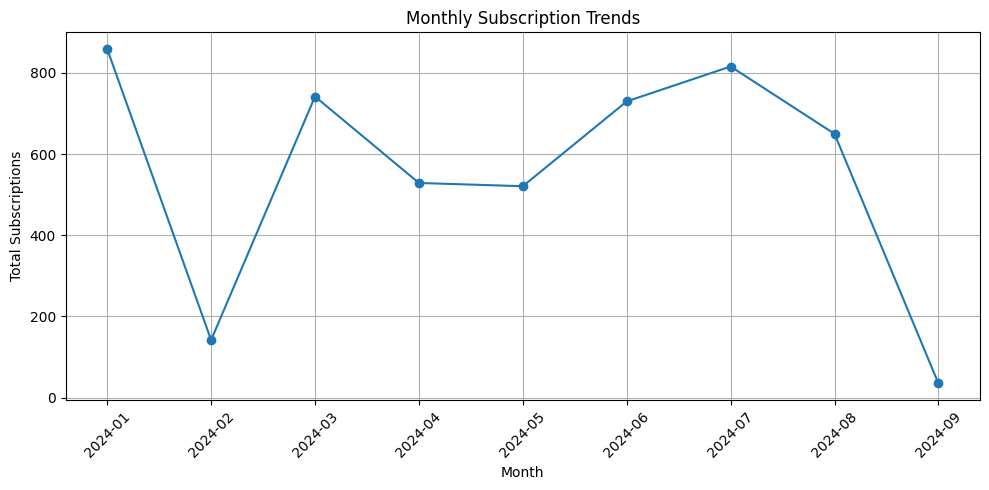

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(subscription_trends['subscription_month'], subscription_trends['total_subscriptions'], marker='o')
plt.title('Monthly Subscription Trends')
plt.xlabel('Month')
plt.ylabel('Total Subscriptions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


   
# **2.   Churn tracking**







In [21]:
#extract end date w/ month
df_cleaned['subscription_end_month'] = df_cleaned['SubscriptionEndDate'].dt.to_period('M').astype(str)


In [22]:
churn_trends = df_cleaned.groupby('subscription_end_month').agg(
    ended_subscriptions=('Student', 'count')
).reset_index()
print(churn_trends)

  subscription_end_month  ended_subscriptions
0                2024-01                    3
1                2024-02                   14
2                2024-03                   53
3                2024-04                  313
4                2024-05                  223
5                2024-06                  653
6                2024-07                 1489
7                2024-08                  993
8                2024-09                  704
9                2024-10                  579




*   Compare the end data with the start data



In [23]:
# Rename for clarity before merging
subscription_trends.rename(columns={'subscription_month': 'month', 'total_subscriptions': 'started_subscriptions'}, inplace=True)
churn_trends.rename(columns={'subscription_end_month': 'month'}, inplace=True)

# Merge both
subscription_churn = pd.merge(subscription_trends, churn_trends, on='month', how='outer').fillna(0)
subscription_churn['started_subscriptions'] = subscription_churn['started_subscriptions'].astype(int)
subscription_churn['ended_subscriptions'] = subscription_churn['ended_subscriptions'].astype(int)

In [24]:
subscription_churn['churn_rate'] = (
    subscription_churn['ended_subscriptions'] / subscription_churn['started_subscriptions']
) * 100

subscription_churn['churn_rate'] = subscription_churn['churn_rate'].replace([float('inf'), -float('inf')], 0)
subscription_churn['churn_rate'] = subscription_churn['churn_rate'].round(2)


In [25]:
#perview
subscription_churn.head()

,month,started_subscriptions,growth_percent,ended_subscriptions,churn_rate
0,2024-01,859,0.00,3,0.35
1,2024-02,142,-83.47,14,9.86
2,2024-03,742,422.54,53,7.14
3,2024-04,529,-28.71,313,59.17
4,2024-05,521,-1.51,223,42.80


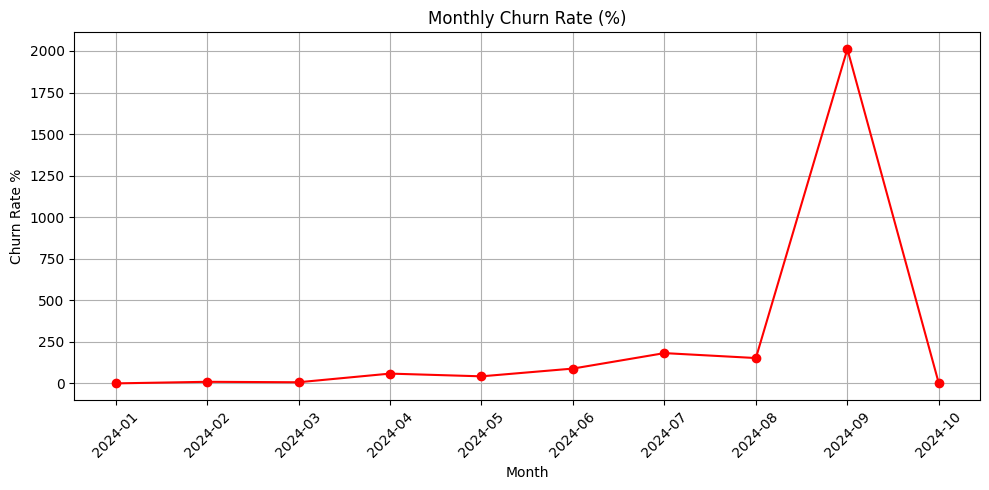

In [26]:
#visulize data
plt.figure(figsize=(10, 5))
plt.plot(subscription_churn['month'], subscription_churn['churn_rate'], marker='o', color='red')
plt.title('Monthly Churn Rate (%)')
plt.xlabel('Month')
plt.ylabel('Churn Rate %')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# **3. Cohort analysis**

In [27]:
#active months
df_cleaned['subscription_start_month'] = df_cleaned['SubscriptionStartDate'].dt.to_period('M')
df_cleaned['subscription_end_month'] = df_cleaned['SubscriptionEndDate'].dt.to_period('M')
df_cleaned.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,...,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,StudentBirthDate,professionalExperience,Industry,age_at_subscription,subscription_month,subscription_end_month,subscription_start_month
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,...,100.00%,True,2024-11-02,2003-07-25,0,Sales,20,2024-01,2024-01,2024-01
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,...,100.00%,True,2024-11-02,2001-03-15,1,Research And Development,22,2024-01,2024-01,2024-01
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,...,100.00%,True,2024-11-02,2000-06-19,0,Research And Development,23,2024-01,2024-01,2024-01
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,...,0.00%,False,2024-10-06,1999-08-12,0,Marketing,24,2024-02,2024-02,2024-02
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,...,26.61%,False,2024-10-06,1997-06-04,3,Design,26,2024-02,2024-02,2024-02


In [28]:
df_cleaned.dtypes


,0
SessionName,object
TrackName,object
Hackerspace,object
Country,object
GroupName,object
ProductSchedule,object
Student,object
StudentGender,object
InstructorFullName,object
InstructorEmail,object


In [29]:
# Months since cohort start
df_cleaned['cohort_index'] = (
    (df_cleaned['subscription_end_month'] - df_cleaned['subscription_start_month']).apply(lambda x: x.n)
)

In [30]:
#group by cohort and period
cohort_data = (
    df_cleaned.groupby(['subscription_start_month', 'cohort_index'])
    .agg(n_students=('Student', 'nunique'))
    .reset_index()
)
print(cohort_data)

   subscription_start_month  cohort_index  n_students
0                   2024-01             0           3
1                   2024-01             1           8
2                   2024-01             2          49
3                   2024-01             3         268
4                   2024-01             4           6
5                   2024-01             5         254
6                   2024-01             6         228
7                   2024-01             7          24
8                   2024-01             9          15
9                   2024-02             0           6
10                  2024-02             1           3
11                  2024-02             2          11
12                  2024-02             3           7
13                  2024-02             4          42
14                  2024-02             5          49
15                  2024-02             6          20
16                  2024-02             7           4
17                  2024-03 

In [31]:
cohort_pivot = cohort_data.pivot(index='subscription_start_month', columns='cohort_index', values='n_students')
cohort_pivot.fillna(0, inplace=True)
cohort_pivot = cohort_pivot.astype(int)
cohort_pivot


cohort_index,0,1,2,3,4,5,6,7,9
subscription_start_month,,,,,,,,,
2024-01,3,8,49,268,6,254,228,24,15
2024-02,6,3,11,7,42,49,20,4,0
2024-03,1,32,179,15,281,176,49,5,0
2024-04,0,29,35,100,32,232,100,0,0
2024-05,1,28,116,25,178,172,0,0,0
2024-06,275,20,167,86,179,0,0,0,0
2024-07,687,37,71,17,0,0,0,0,0
2024-08,508,55,83,0,0,0,0,0,0
2024-09,29,6,0,0,0,0,0,0,0


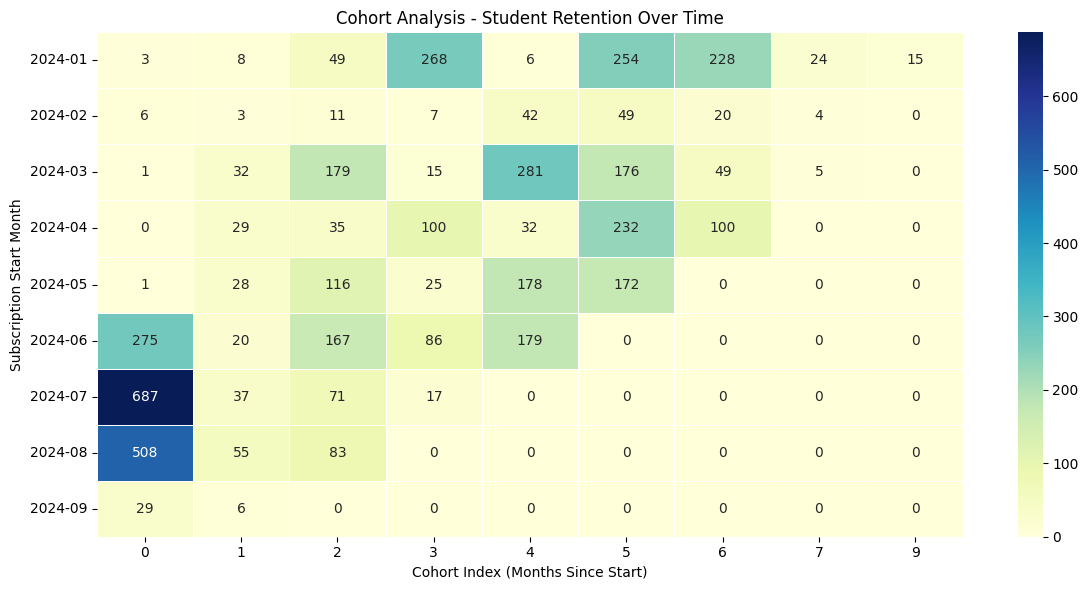

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

plt.title("Cohort Analysis - Student Retention Over Time")
plt.xlabel("Cohort Index (Months Since Start)")
plt.ylabel("Subscription Start Month")
plt.tight_layout()
plt.show()




* COHORT ANALYSIS BY COUNTRY



In [33]:
#calculate cohort index
df_cleaned['cohort_index'] = (
    df_cleaned['subscription_end_month'] - df_cleaned['subscription_start_month']
).apply(lambda x: x.n)

#group by country and cohort index
grouped = (
    df_cleaned
    .groupby(['Country', 'subscription_start_month', 'cohort_index'])
    .agg(n_students=('Student', 'count'))
    .reset_index()
)

#create a matrix
cohort_matrix_country = grouped.pivot_table(
    index='Country',
    columns='cohort_index',
    values='n_students',
    fill_value=0
)
cohort_matrix_country

cohort_index,0,1,2,3,4,5,6,7,9
Country,,,,,,,,,
Algeria,34.0,8.000000,7.666667,7.333333,3.0,17.666667,8.000000,4.0,0.0
Côte d'Ivoire,0.0,8.333333,22.333333,12.600000,13.6,16.750000,19.000000,0.0,0.0
Egypt,0.0,4.400000,3.600000,9.000000,8.0,5.333333,13.000000,0.0,0.0
Kenya,1.0,0.000000,4.000000,4.000000,5.0,17.333333,10.000000,2.0,0.0
Morocco,5.2,3.000000,11.142857,10.250000,9.0,18.333333,6.000000,0.0,0.0
Nigeria,6.5,7.428571,17.666667,16.600000,60.6,93.500000,59.666667,0.0,0.0
Senegal,28.0,0.000000,23.428571,32.750000,27.0,17.800000,14.500000,0.0,15.0
Tunisia,429.0,14.833333,23.125000,21.000000,28.8,36.000000,29.250000,13.5,0.0


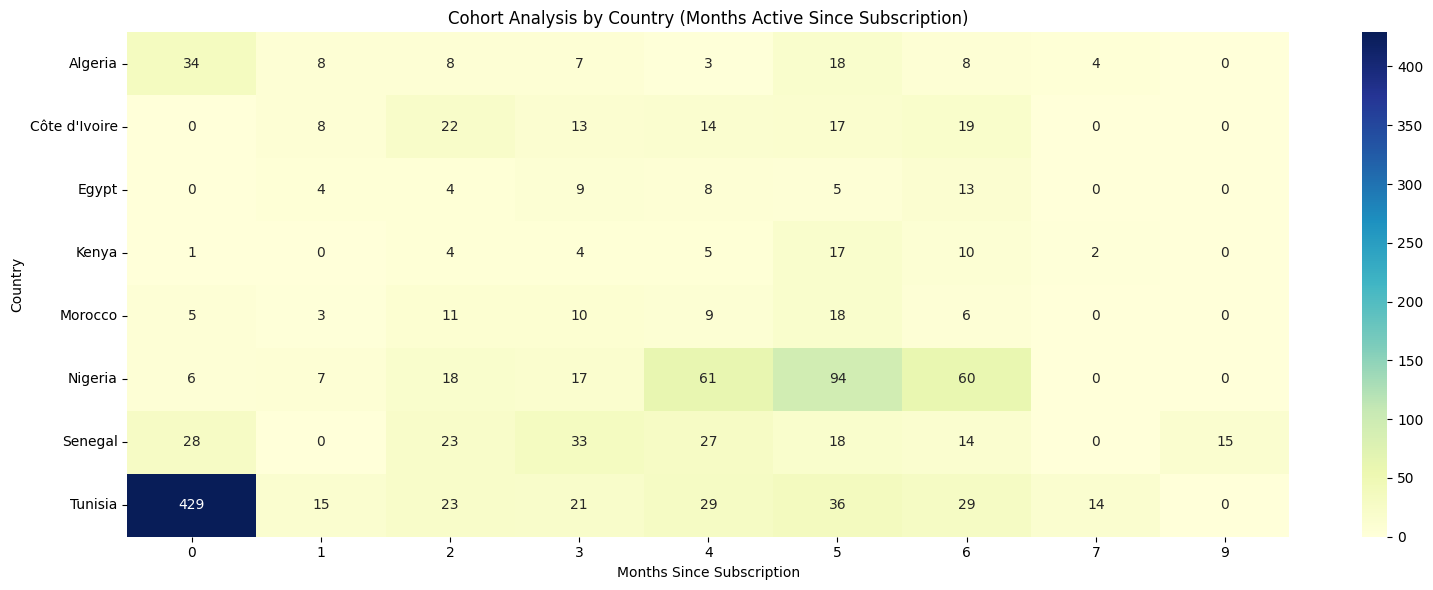

In [34]:
plt.figure(figsize=(16, 6))
sns.heatmap(cohort_matrix_country, cmap='YlGnBu', annot=True,  fmt='.0f')
plt.title('Cohort Analysis by Country (Months Active Since Subscription)')
plt.xlabel('Months Since Subscription')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

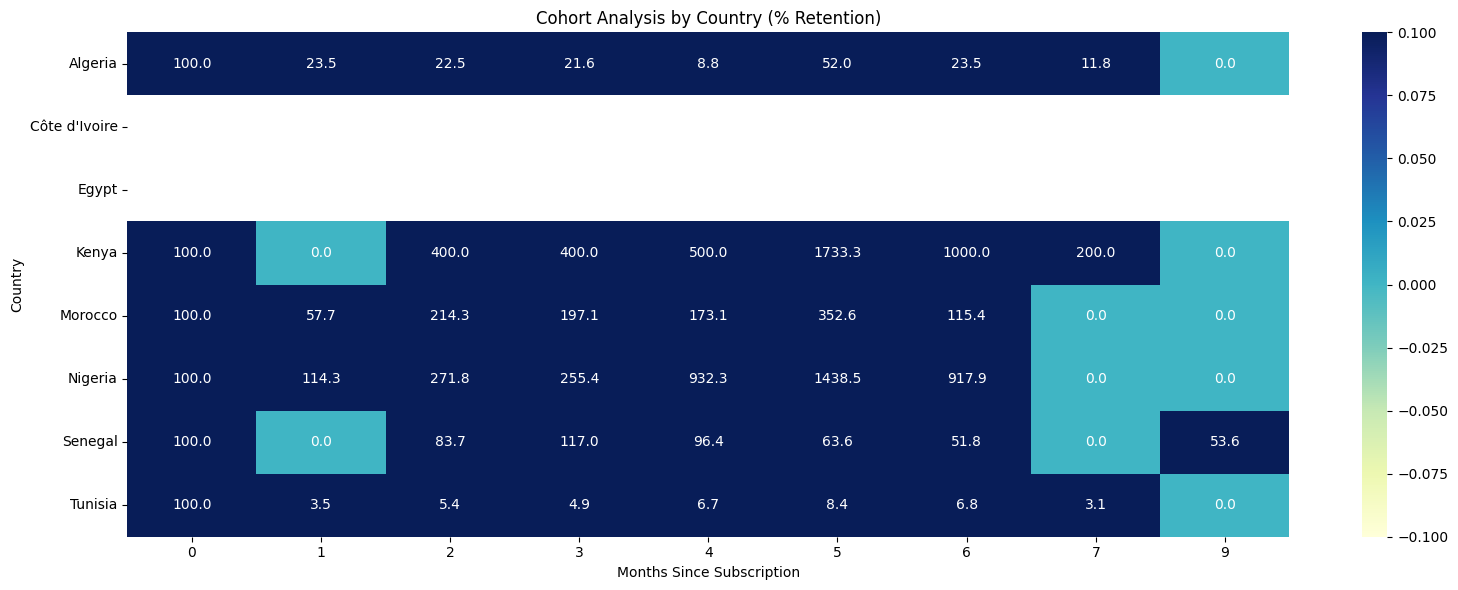

In [35]:
#visulize retention rate

retention_matrix = cohort_matrix_country.divide(cohort_matrix_country[0], axis=0) * 100

plt.figure(figsize=(16, 6))
sns.heatmap(retention_matrix, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Cohort Analysis by Country (% Retention)')
plt.xlabel('Months Since Subscription')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Note :**
Egypt and cote d'ivoire retention rate isn't calculate it because the 1st month subscription number is 0 so in the following I will try to fix it by switching the starting month to february which is the 2nd month

In [36]:
new_retention_rows = {}

for country in cohort_matrix_country.index:
    row = cohort_matrix_country.loc[country]
    # Find first month with >0 subscribers
    first_non_zero_index = row[row > 0].index.min()

    if pd.isna(first_non_zero_index):
        continue  # skip if all zero

    # Slice from first non-zero month onwards
    shifted_row = row.loc[first_non_zero_index:]
    base = shifted_row.iloc[0]
    retention = (shifted_row / base) * 100

    # Store as dict with original cohort_index as keys (not reset index)
    new_retention_rows[country] = retention

# Create DataFrame from dict of Series (keeps columns as cohort_index values)
new_retention_matrix = pd.DataFrame(new_retention_rows).T.fillna(0)

# Optional: convert columns to int type if they are numeric strings
new_retention_matrix.columns = new_retention_matrix.columns.astype(int)

# Sort columns if needed
new_retention_matrix = new_retention_matrix.sort_index(axis=1)


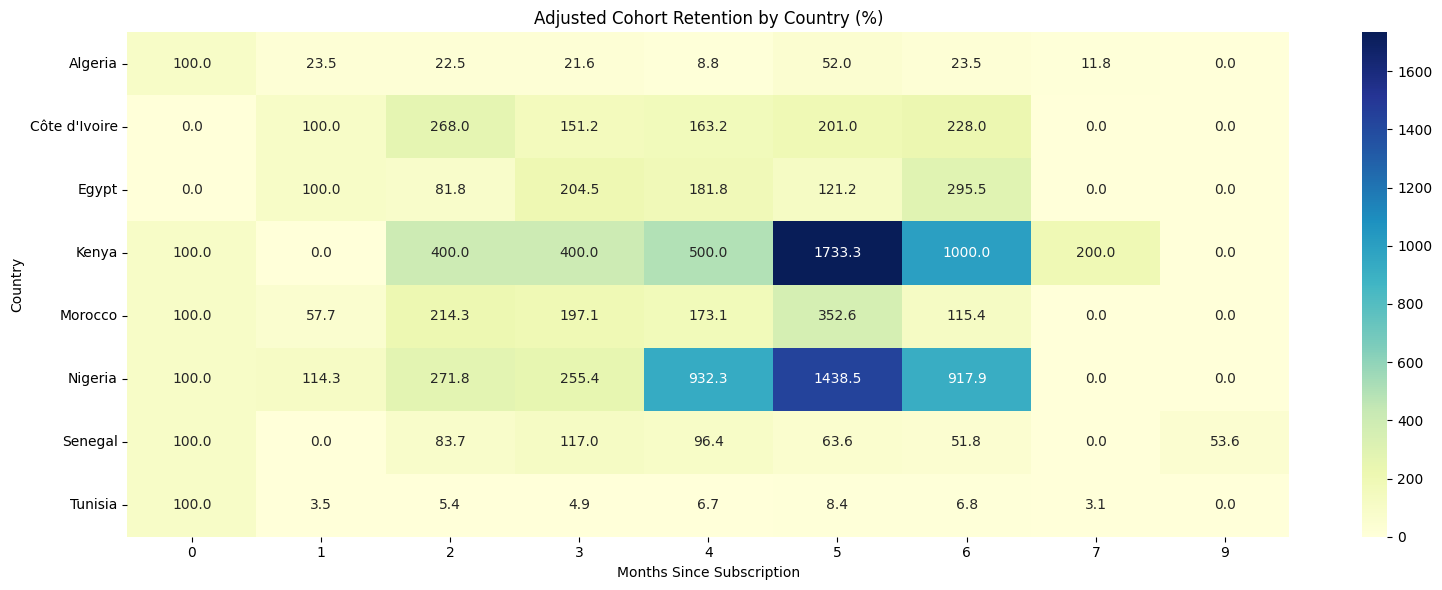

In [37]:
plt.figure(figsize=(16, 6))
sns.heatmap(new_retention_matrix, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Adjusted Cohort Retention by Country (%)')
plt.xlabel('Months Since Subscription')
plt.ylabel('Country')
plt.tight_layout()
plt.show()




*  **GROUP BY AGE AND COHORT INDEX**


In [38]:
#Define age groups

age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df_cleaned['age_group'] = pd.cut(df_cleaned['age_at_subscription'], bins=age_bins, labels=age_labels, right=False)


In [39]:
grouped_age = (
    df_cleaned
    .groupby(['age_group', 'subscription_start_month', 'cohort_index'], observed=True)
    .agg(n_students=('Student', 'count'))
    .reset_index()
)

#Matrix by age group
cohort_matrix_age = grouped_age.pivot_table(
    index='age_group',
    columns='cohort_index',
    values='n_students',
    fill_value=0,
    observed=True
)

#calculate retention rate
retention_by_age = {}

for age_group in cohort_matrix_age.index:
    row = cohort_matrix_age.loc[age_group]
    first_non_zero_index = row[row > 0].index.min()
    if pd.isna(first_non_zero_index):
        continue
    shifted_row = row.loc[first_non_zero_index:]
    base = shifted_row.iloc[0]
    retention = (shifted_row / base) * 100
    retention_by_age[age_group] = retention

retention_matrix_age = pd.DataFrame(retention_by_age).T.fillna(0)
retention_matrix_age.columns = retention_matrix_age.columns.astype(int)
retention_matrix_age = retention_matrix_age.sort_index(axis=1)

retention_matrix_age

cohort_index,0,1,2,3,4,5,6,7,9
<20,100.0,3.600465,7.876016,8.362369,3.590786,6.666667,6.097561,1.016260,0.000000
20-29,100.0,37.261504,180.303030,147.186147,265.993266,408.080808,215.151515,28.282828,48.484848
30-39,100.0,78.222222,254.000000,194.285714,533.333333,700.800000,380.000000,40.000000,32.000000
40-49,100.0,91.666667,125.000000,110.000000,208.333333,260.000000,137.500000,25.000000,25.000000
50-59,100.0,50.000000,112.500000,125.000000,75.000000,90.000000,50.000000,0.000000,0.000000
60+,100.0,100.000000,120.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000


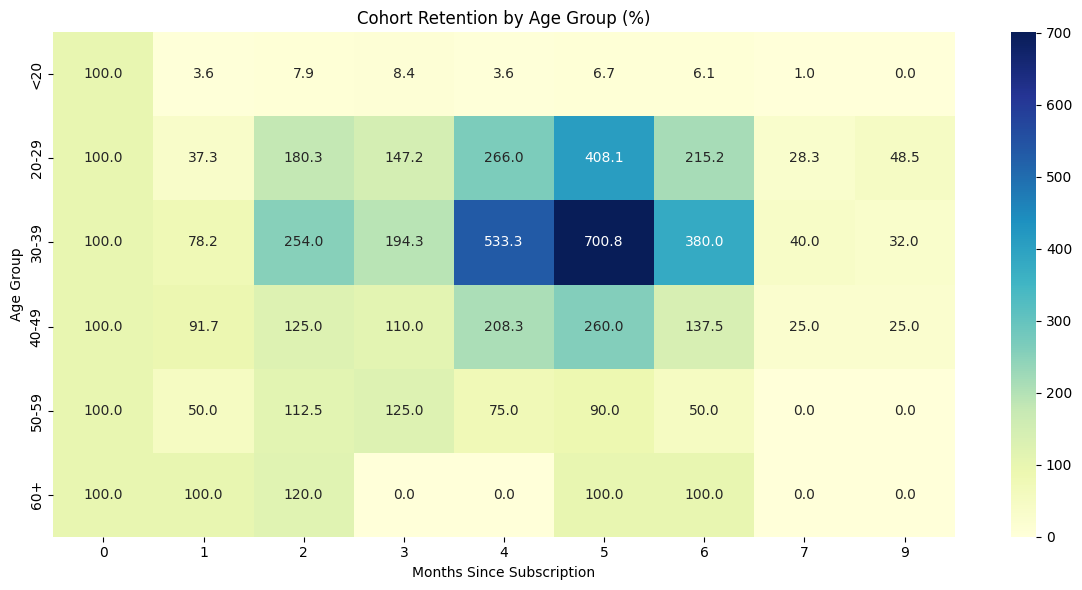

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_matrix_age, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Cohort Retention by Age Group (%)')
plt.xlabel('Months Since Subscription')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()




*  **COHORT ANALYSIS BY COUNTRY AND AGE**


In [41]:
grouped = (
    df_cleaned
    .groupby(['Country', 'age_group', 'subscription_start_month', 'cohort_index'], observed=True)
    .agg(n_students=('Student', 'count'))
    .reset_index()
)

cohort_matrix_country_age = grouped.pivot_table(
    index=['Country', 'age_group'],
    columns='cohort_index',
    values='n_students',
    fill_value=0,
    observed=True
)

#calculate
retention_by_country_age = {}

for idx in cohort_matrix_country_age.index:
    row = cohort_matrix_country_age.loc[idx]
    first_non_zero_index = row[row > 0].index.min()
    if pd.isna(first_non_zero_index):
        continue
    shifted_row = row.loc[first_non_zero_index:]
    base = shifted_row.iloc[0]
    retention = (shifted_row / base) * 100
    retention_by_country_age[idx] = retention

retention_matrix_country_age = pd.DataFrame(retention_by_country_age).T.fillna(0)
retention_matrix_country_age.columns = retention_matrix_country_age.columns.astype(int)
retention_matrix_country_age = retention_matrix_country_age.sort_index(axis=1)


In [42]:
print(retention_matrix_country_age.index)


MultiIndex([(      'Algeria',   '<20'),
            (      'Algeria', '20-29'),
            (      'Algeria', '30-39'),
            (      'Algeria', '40-49'),
            (      'Algeria', '50-59'),
            ('Côte d'Ivoire',   '<20'),
            ('Côte d'Ivoire', '20-29'),
            ('Côte d'Ivoire', '30-39'),
            ('Côte d'Ivoire', '40-49'),
            ('Côte d'Ivoire', '50-59'),
            (        'Egypt',   '<20'),
            (        'Egypt', '20-29'),
            (        'Egypt', '30-39'),
            (        'Egypt', '40-49'),
            (        'Kenya',   '<20'),
            (        'Kenya', '20-29'),
            (        'Kenya', '30-39'),
            (        'Kenya', '40-49'),
            (      'Morocco',   '<20'),
            (      'Morocco', '20-29'),
            (      'Morocco', '30-39'),
            (      'Morocco', '40-49'),
            (      'Morocco', '50-59'),
            (      'Morocco',   '60+'),
            (      'Nigeria',   '<20'),


In [43]:
#Fixing multi index issue
retention_matrix_country_age.index = pd.MultiIndex.from_tuples(
    retention_matrix_country_age.index, names=['Country', 'age_group']
)


In [44]:
countries = retention_matrix_country_age.index.get_level_values('Country').unique()


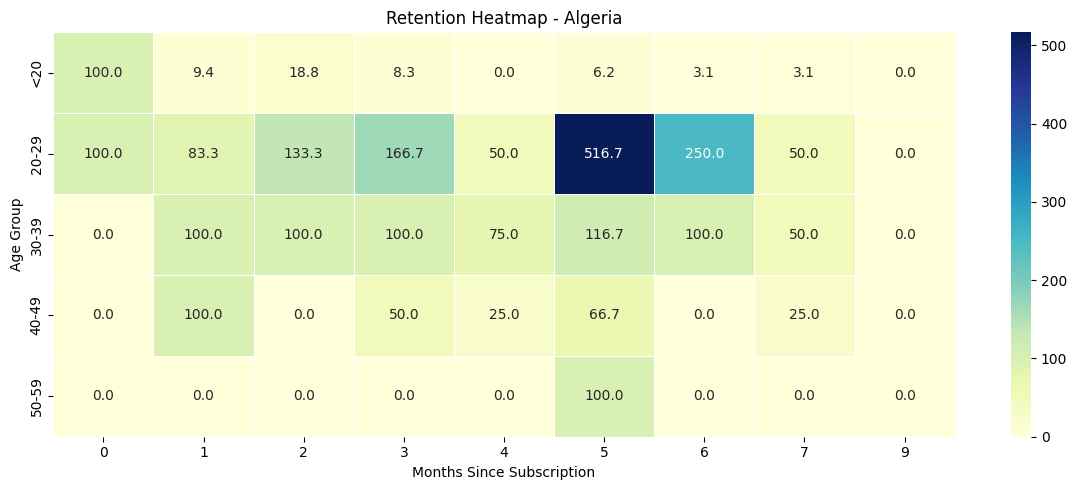

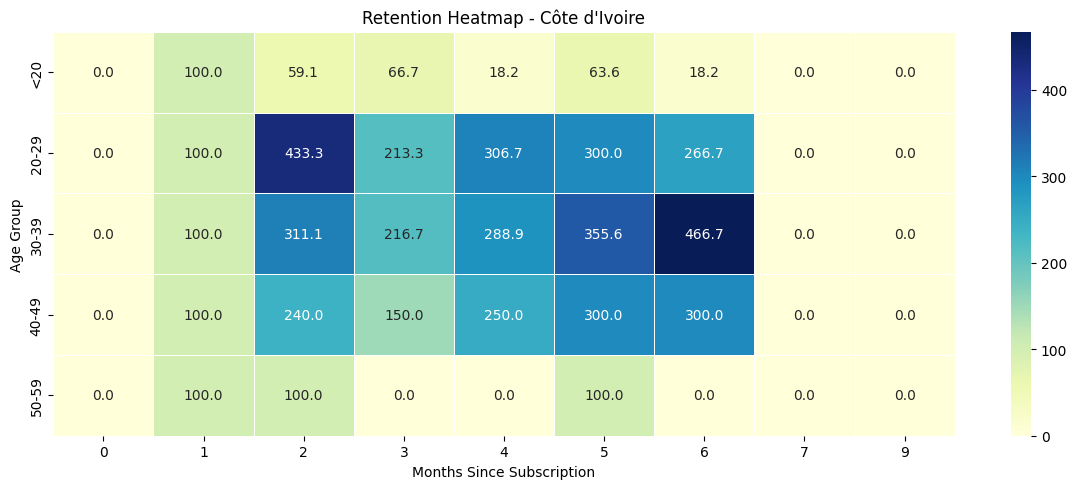

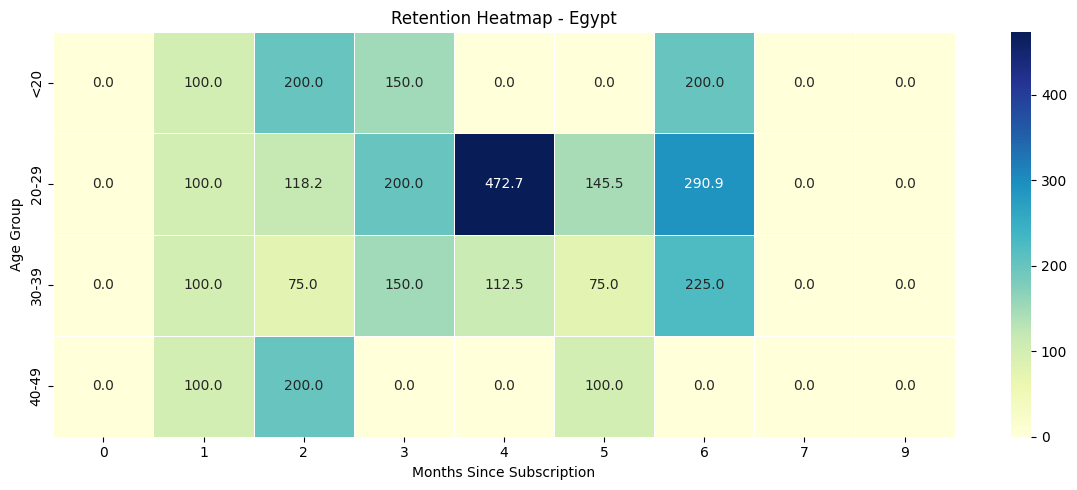

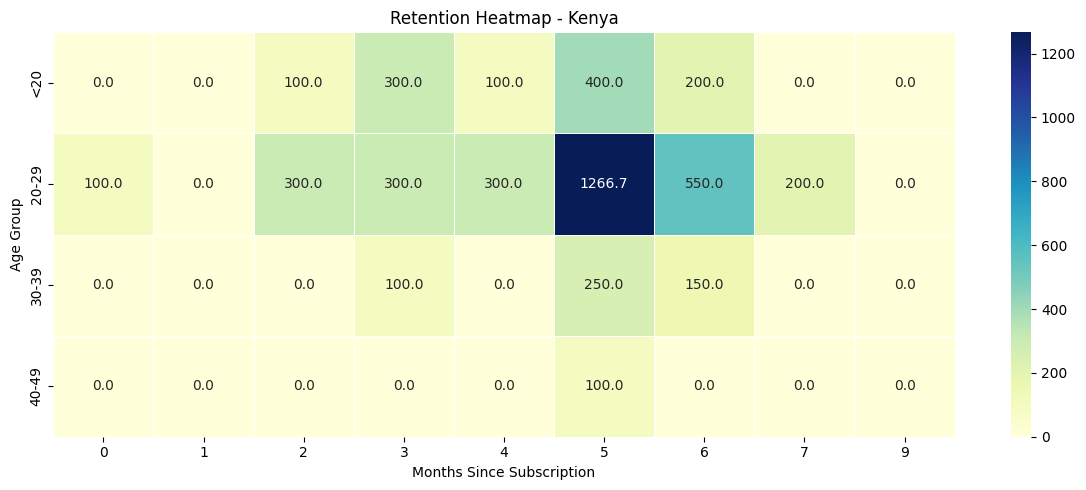

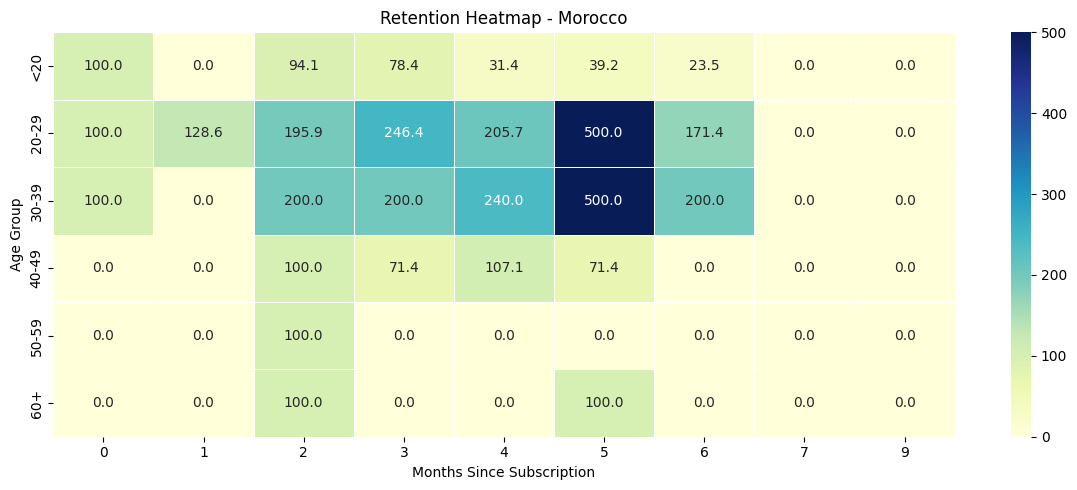

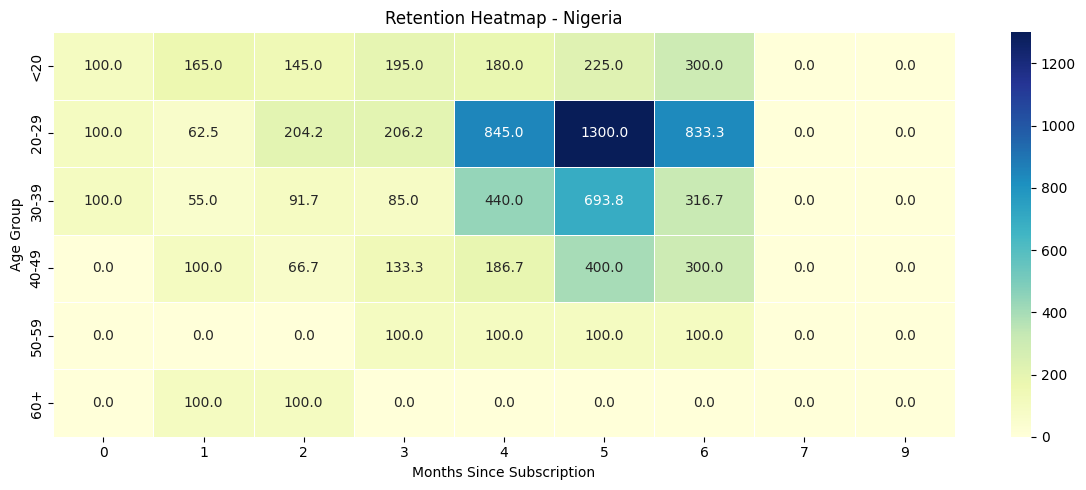

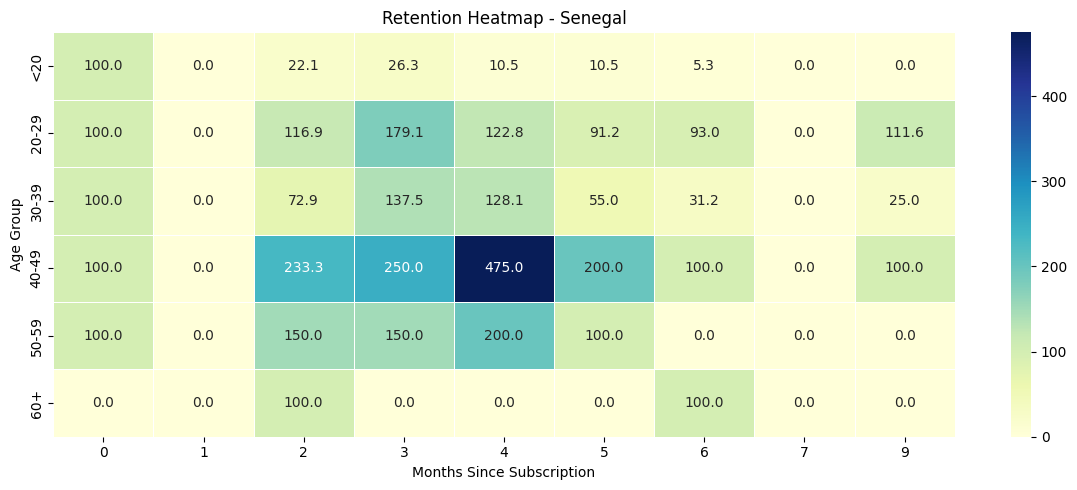

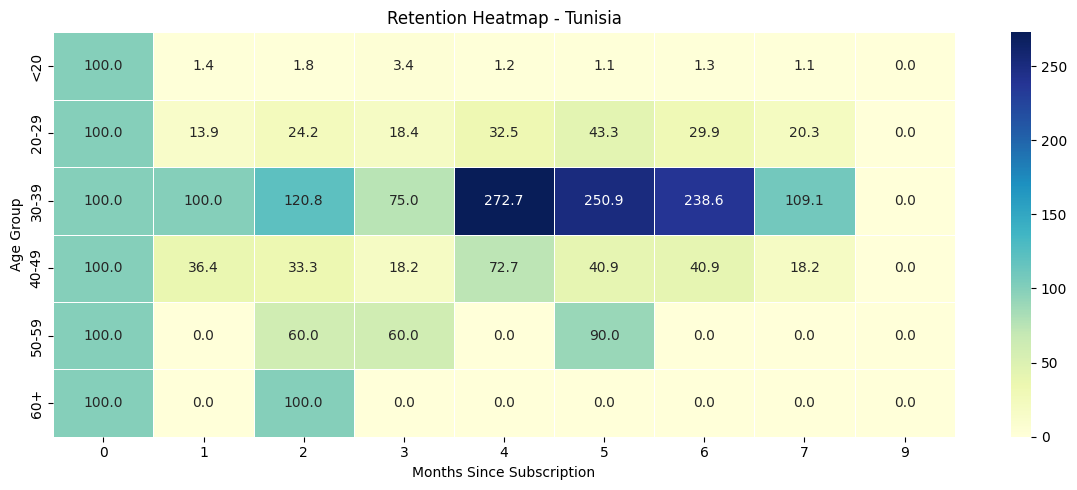

In [45]:
for country in countries:
    filtered_retention = retention_matrix_country_age.loc[country]

    plt.figure(figsize=(12, 5))
    sns.heatmap(filtered_retention, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
    plt.title(f'Retention Heatmap - {country}')
    plt.xlabel('Months Since Subscription')
    plt.ylabel('Age Group')
    plt.tight_layout()
    plt.show()





*   **GROUP BY PRODUCT**




In [46]:
grouped_by_product = (
    df_cleaned
    .groupby(['TrackName', 'subscription_start_month', 'cohort_index'], observed=True)
    .agg(n_students=('Student', 'count'))
    .reset_index()
)

cohort_matrix_product = grouped_by_product.pivot_table(
    index='TrackName',
    columns='cohort_index',
    values='n_students',
    fill_value=0
)


In [47]:
retention_matrix_product = {}

for track in cohort_matrix_product.index:
    row = cohort_matrix_product.loc[track]
    first_non_zero_index = row[row > 0].index.min()
    if pd.isna(first_non_zero_index):
        continue
    shifted_row = row.loc[first_non_zero_index:]
    base = shifted_row.iloc[0]
    retention = (shifted_row / base) * 100
    retention_matrix_product[track] = retention

retention_matrix_product = pd.DataFrame(retention_matrix_product).T.fillna(0)
retention_matrix_product.columns = retention_matrix_product.columns.astype(int)
retention_matrix_product = retention_matrix_product.sort_index(axis=1)

retention_matrix_product

cohort_index,0,1,2,3,4,5,6,7,9
Advanced digital marketing: E-commerce & SEO,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Coding With Python,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Cyber Security Bootcamp: Certified CompTIA Security +,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0
Cyber Security Bootcamp: Certified CompTIA Security+ 701*,0.0,0.000000,100.000000,0.000000,1340.000000,80.000000,0.000000,0.000000,0.0
Cybersecurity - Comptia Security + Certified,0.0,100.000000,13.333333,53.333333,591.111111,1180.000000,0.000000,120.000000,0.0
Data Analytics - Microsoft Power BI Certified*,100.0,116.666667,88.888889,0.000000,496.666667,363.333333,0.000000,50.000000,0.0
Data Scientist Bootcamp*,100.0,0.000000,150.000000,0.000000,0.000000,1320.000000,1625.000000,0.000000,0.0
Digital Marketing : Meta Certified,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Digital Marketing Course - Meta Certified,100.0,0.000000,0.000000,300.000000,2350.000000,500.000000,0.000000,0.000000,0.0
Digital Marketing: Social Media Management - FR,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


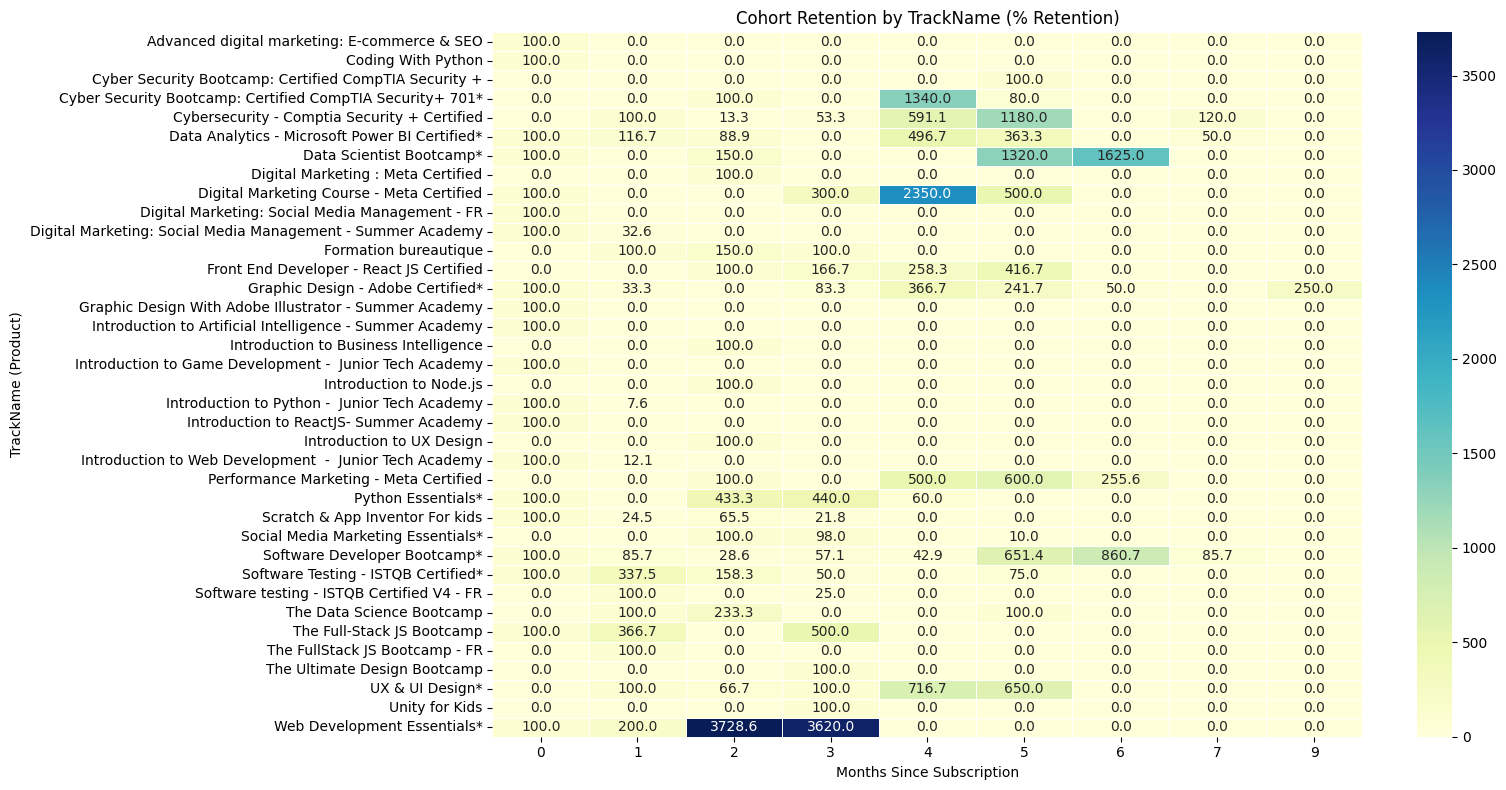

In [48]:
plt.figure(figsize=(16, 8))
sns.heatmap(retention_matrix_product, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Cohort Retention by TrackName (% Retention)')
plt.xlabel('Months Since Subscription')
plt.ylabel('TrackName (Product)')
plt.tight_layout()
plt.show()

* **GROUP BY PRODUCT AND COUNTRY**

In [49]:
grouped_ct = (
    df_cleaned
    .groupby(['Country', 'TrackName', 'subscription_start_month', 'cohort_index'], observed=True)
    .agg(n_students=('Student', 'count'))
    .reset_index()
)

cohort_matrix_ct = grouped_ct.pivot_table(
    index=['Country', 'TrackName'],
    columns='cohort_index',
    values='n_students',
    fill_value=0
)

cohort_matrix_ct

cohort_index                                                  0      1  \
Country TrackName                                                        
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...  0.0   0.00   
        Cybersecurity - Comptia Security + Certified        0.0   0.00   
        Data Analytics - Microsoft Power BI Certified*      0.0   0.00   
        Data Scientist Bootcamp*                            0.0   0.00   
        Digital Marketing Course - Meta Certified           0.0   0.00   
...                                                         ...    ...   
Tunisia Software Testing - ISTQB Certified*                 4.0  11.25   
        The Full-Stack JS Bootcamp                          0.0   0.00   
        UX & UI Design*                                     0.0   0.00   
        Unity for Kids                                      0.0   0.00   
        Web Development Essentials*                         0.0   2.00   

cohort_index                                                       2  \
Country TrackName                                                      
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...  0.000000   
        Cybersecurity - Comptia Security + Certified        0.000000   
        Data Analytics - Microsoft Power BI Certified*      0.000000   
        Data Scientist Bootcamp*                            0.000000   
        Digital Marketing Course - Meta Certified           0.000000   
...                                                              ...   
Tunisia Software Testing - ISTQB Certified*                 5.333333   
        The Full-Stack JS Bootcamp                          0.000000   
        UX & UI Design*                                     2.000000   
        Unity for Kids                                      0.000000   
        Web Development Essentials*                         8.600000   

cohort_index                                                        3    4  \
Country TrackName                                                            
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...   0.000000  0.0   
        Cybersecurity - Comptia Security + Certified         0.000000  0.0   
        Data Analytics - Microsoft Power BI Certified*       0.000000  4.0   
        Data Scientist Bootcamp*                             0.000000  0.0   
        Digital Marketing Course - Meta Certified            0.000000  0.0   
...                                                               ...  ...   
Tunisia Software Testing - ISTQB Certified*                  2.000000  0.0   
        The Full-Stack JS Bootcamp                           5.000000  0.0   
        UX & UI Design*                                      3.000000  2.0   
        Unity for Kids                                       5.666667  0.0   
        Web Development Essentials*                         10.000000  0.0   

cohort_index                                                       5    6  \
Country TrackName                                                           
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...  4.000000  0.0   
        Cybersecurity - Comptia Security + Certified        0.000000  0.0   
        Data Analytics - Microsoft Power BI Certified*      4.666667  0.0   
        Data Scientist Bootcamp*                            3.000000  0.0   
        Digital Marketing Course - Meta Certified           5.000000  0.0   
...                                                              ...  ...   
Tunisia Software Testing - ISTQB Certified*                 0.000000  0.0   
        The Full-Stack JS Bootcamp                          0.000000  0.0   
        UX & UI Design*                                     7.000000  0.0   
        Unity for Kids                                      0.000000  0.0   
        Web Development Essentials*                         0.000000  0.0   

cohort_index                                                  7    9  
Country Trac

In [50]:
retention_matrix_ct = {}

for index in cohort_matrix_ct.index:
    row = cohort_matrix_ct.loc[index]
    first_non_zero_index = row[row > 0].index.min()
    if pd.isna(first_non_zero_index):
        continue
    shifted_row = row.loc[first_non_zero_index:]
    base = shifted_row.iloc[0]
    retention = (shifted_row / base) * 100
    retention_matrix_ct[index] = retention

# Convert to DataFrame
retention_matrix_ct = pd.DataFrame(retention_matrix_ct).T
retention_matrix_ct.fillna(0, inplace=True)

# Convert to proper MultiIndex and sort
retention_matrix_ct.index = pd.MultiIndex.from_tuples(retention_matrix_ct.index, names=['Country', 'TrackName'])
retention_matrix_ct.columns = retention_matrix_ct.columns.astype(int)
retention_matrix_ct = retention_matrix_ct.sort_index()

retention_matrix_ct

cohort_index                                                    0       1  \
Country TrackName                                                           
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...    0.0    0.00   
        Cybersecurity - Comptia Security + Certified          0.0    0.00   
        Data Analytics - Microsoft Power BI Certified*        0.0    0.00   
        Data Scientist Bootcamp*                              0.0    0.00   
        Digital Marketing Course - Meta Certified             0.0    0.00   
...                                                           ...     ...   
Tunisia Software Testing - ISTQB Certified*                 100.0  281.25   
        The Full-Stack JS Bootcamp                            0.0    0.00   
        UX & UI Design*                                       0.0    0.00   
        Unity for Kids                                        0.0    0.00   
        Web Development Essentials*                           0.0  100.00   

cohort_index                                                         2      3  \
Country TrackName                                                               
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...    0.000000    0.0   
        Cybersecurity - Comptia Security + Certified          0.000000    0.0   
        Data Analytics - Microsoft Power BI Certified*        0.000000    0.0   
        Data Scientist Bootcamp*                              0.000000    0.0   
        Digital Marketing Course - Meta Certified             0.000000    0.0   
...                                                                ...    ...   
Tunisia Software Testing - ISTQB Certified*                 133.333333   50.0   
        The Full-Stack JS Bootcamp                            0.000000  100.0   
        UX & UI Design*                                     100.000000  150.0   
        Unity for Kids                                        0.000000  100.0   
        Web Development Essentials*                         430.000000  500.0   

cohort_index                                                    4           5  \
Country TrackName                                                               
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...    0.0  100.000000   
        Cybersecurity - Comptia Security + Certified          0.0    0.000000   
        Data Analytics - Microsoft Power BI Certified*      100.0  116.666667   
        Data Scientist Bootcamp*                              0.0  100.000000   
        Digital Marketing Course - Meta Certified             0.0  100.000000   
...                                                           ...         ...   
Tunisia Software Testing - ISTQB Certified*                   0.0    0.000000   
        The Full-Stack JS Bootcamp                            0.0    0.000000   
        UX & UI Design*                                     100.0  350.000000   
        Unity for Kids                                        0.0    0.000000   
        Web Development Essentials*                           0.0    0.000000   

cohort_index                                                  6      7    9  
Country TrackName                                                            
Algeria Cyber Security Bootcamp: Certified CompTIA Secu...  0.0    0.0  0.0  
        Cybersecurity - Comptia Security + Certified        0.0  100.0  0.0  
        Data Analytics - Microsoft Power BI Certified*      0.0    0.0  0.0  
        Data Scientist Bootcamp*                            0.0    0.0  0.0  
        Digital Marketing Course - Meta Certified           0.0    0.0  0.0  
...                                                         ...    ...  ...  
Tunisia Software Testing - ISTQB Certified*                 0.0    0.0  0.0  
        The Full-Stack JS Bootcamp                          0.0    0.0  0.0  
        UX & UI Design*                                     0.0    0.0  0.0  
        Unity for Kids          

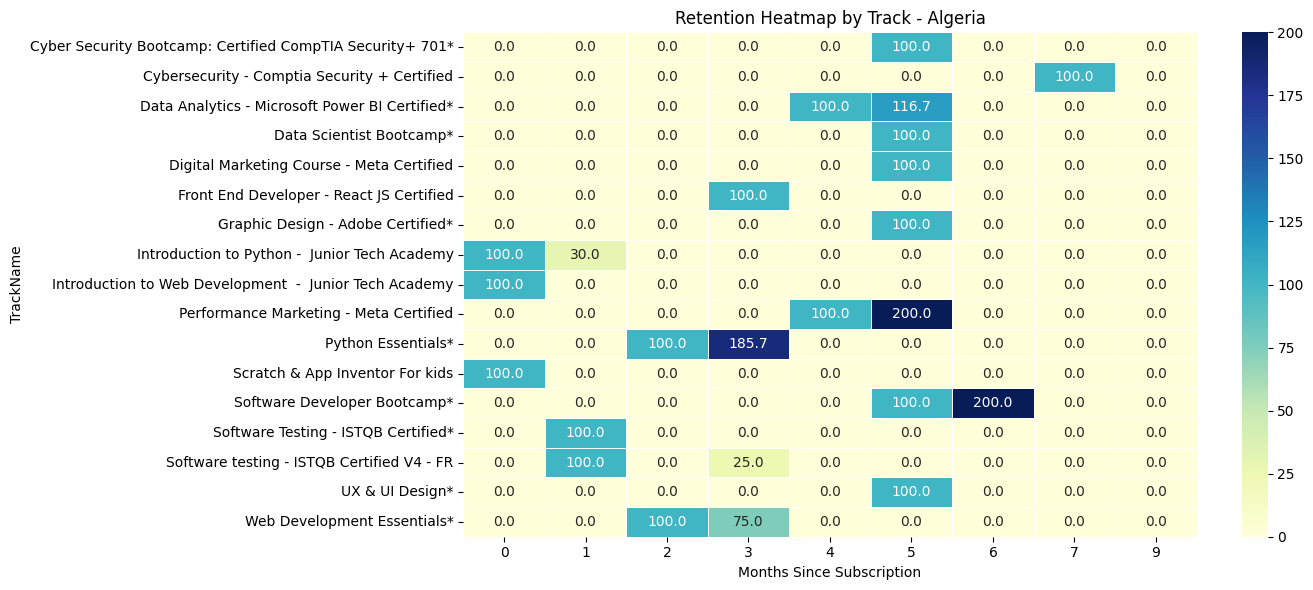

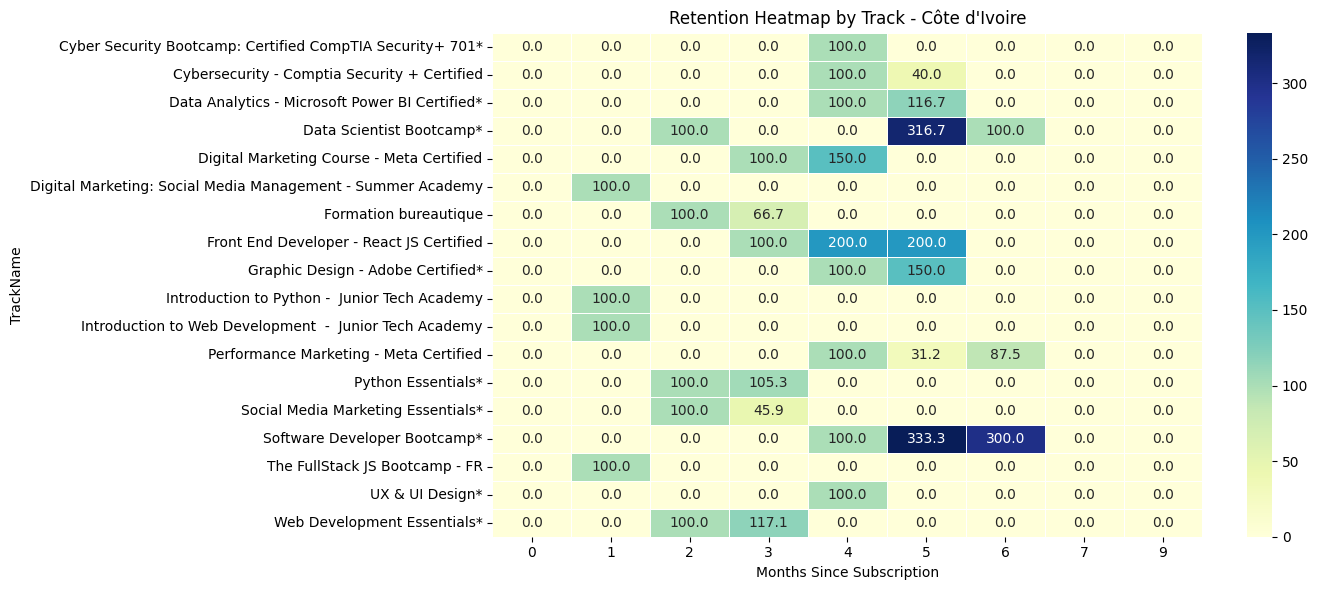

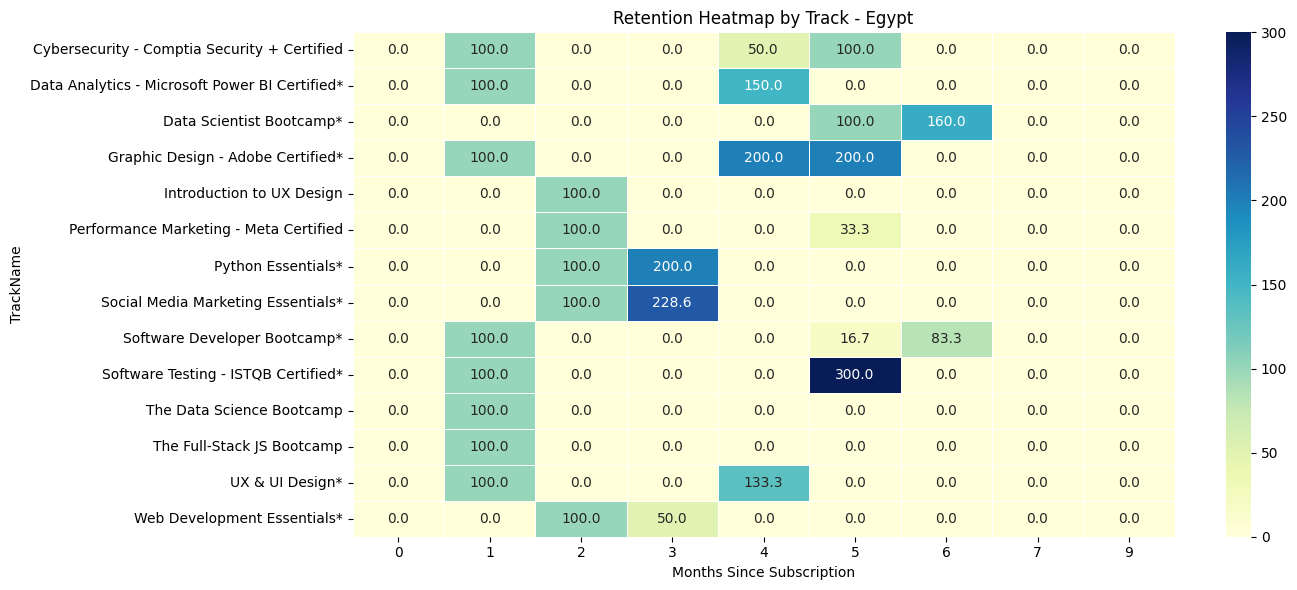

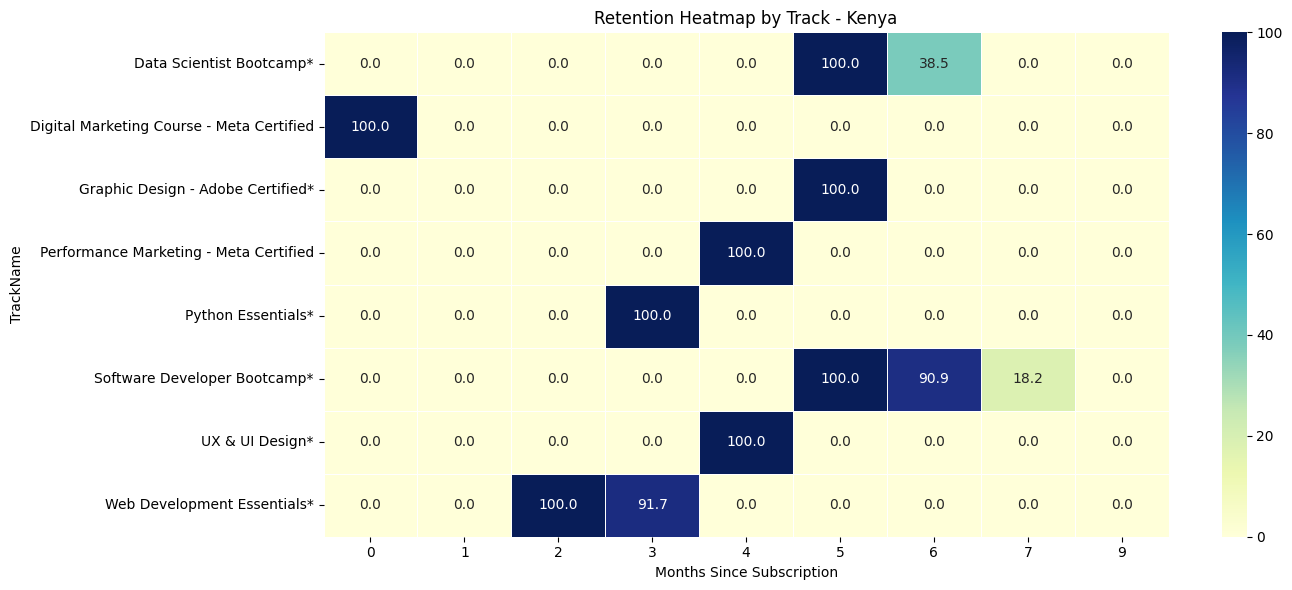

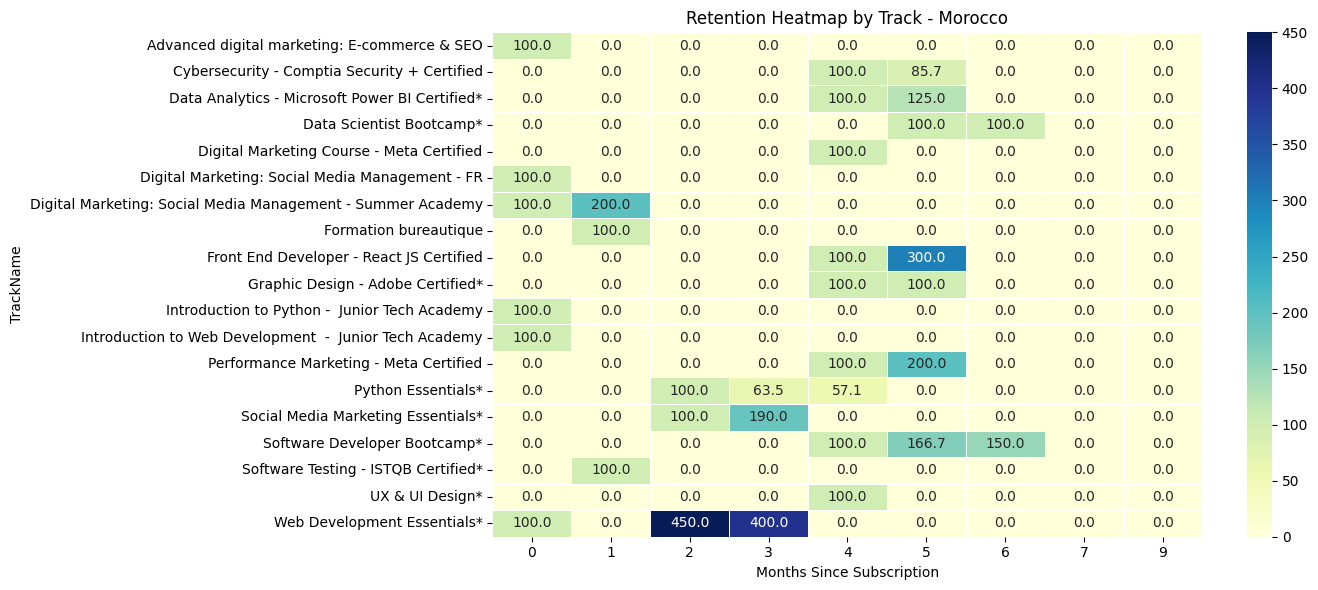

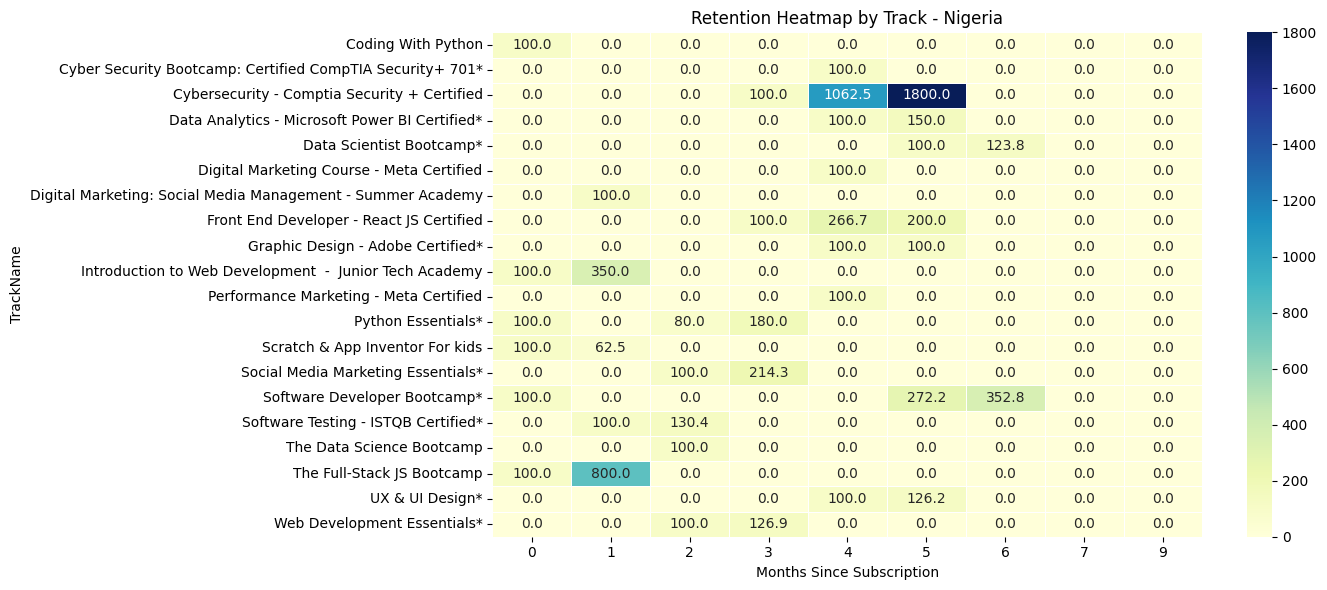

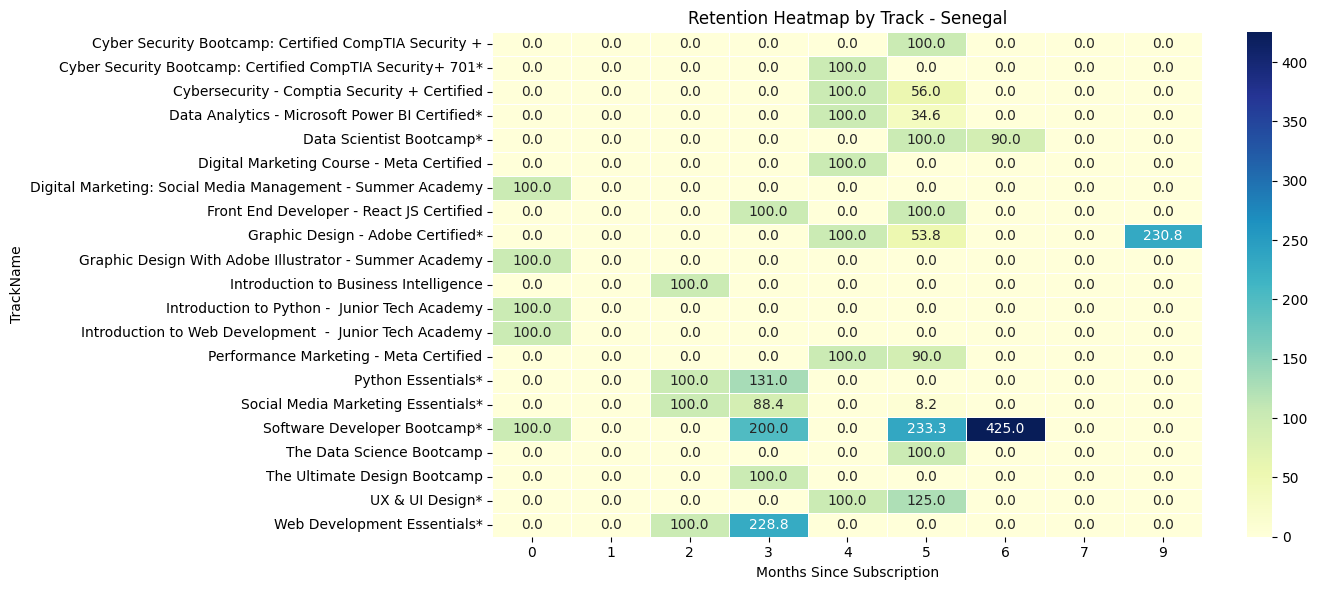

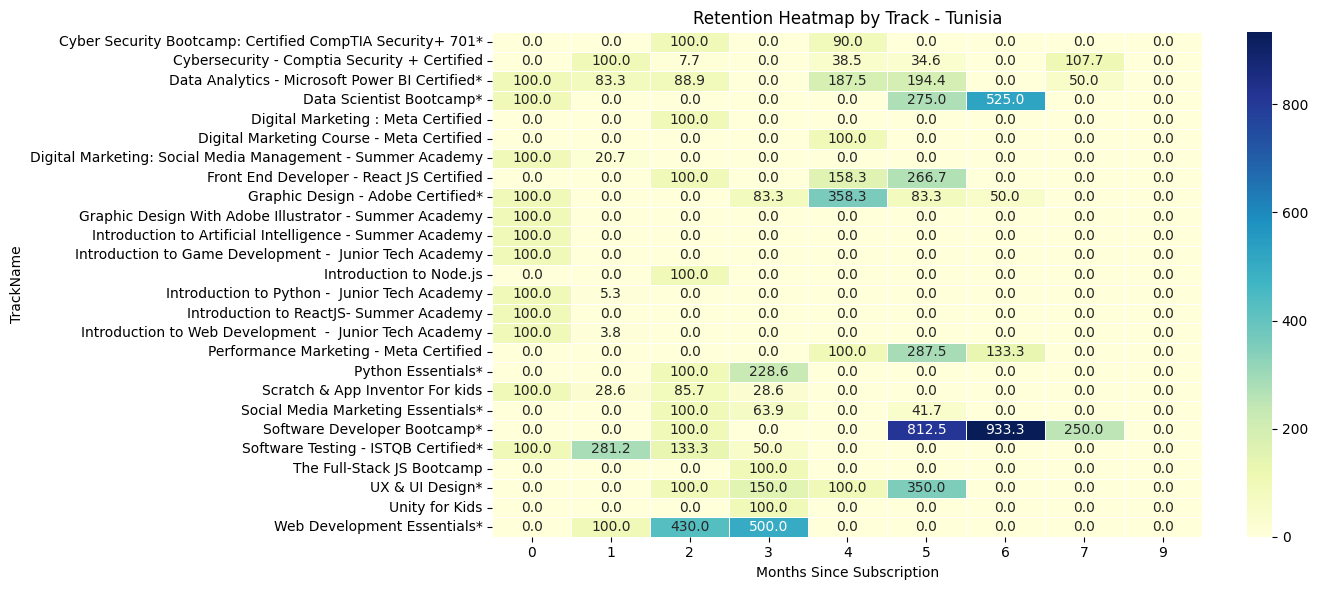

In [51]:
countries = retention_matrix_ct.index.get_level_values('Country').unique()

for country in countries:
    filtered = retention_matrix_ct.loc[country]

    plt.figure(figsize=(14, 6))
    sns.heatmap(filtered, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
    plt.title(f'Retention Heatmap by Track - {country}')
    plt.xlabel('Months Since Subscription')
    plt.ylabel('TrackName')
    plt.tight_layout()
    plt.show()

* Best product per country

In [52]:
avg_retention = retention_matrix_ct.mean(axis=1).reset_index()
avg_retention.columns = ['Country', 'TrackName', 'AverageRetention']

# For each country, get the product with highest average retention
best_products = avg_retention.loc[avg_retention.groupby('Country')['AverageRetention'].idxmax()]
best_products = best_products.sort_values(by='AverageRetention', ascending=False)

print("Best Performing Product per Country:")
print(best_products)


Best Performing Product per Country:
           Country                                     TrackName  \
78         Nigeria  Cybersecurity - Comptia Security + Certified   
137        Tunisia                  Software Developer Bootcamp*   
112        Senegal                  Software Developer Bootcamp*   
75         Morocco                   Web Development Essentials*   
31   Côte d'Ivoire                  Software Developer Bootcamp*   
38           Egypt             Graphic Design - Adobe Certified*   
9          Algeria        Performance Marketing - Meta Certified   
54           Kenya                  Software Developer Bootcamp*   

     AverageRetention  
78         329.166667  
137        232.870370  
112        106.481481  
75         105.555556  
31          81.481481  
38          55.555556  
9           33.333333  
54          23.232323  


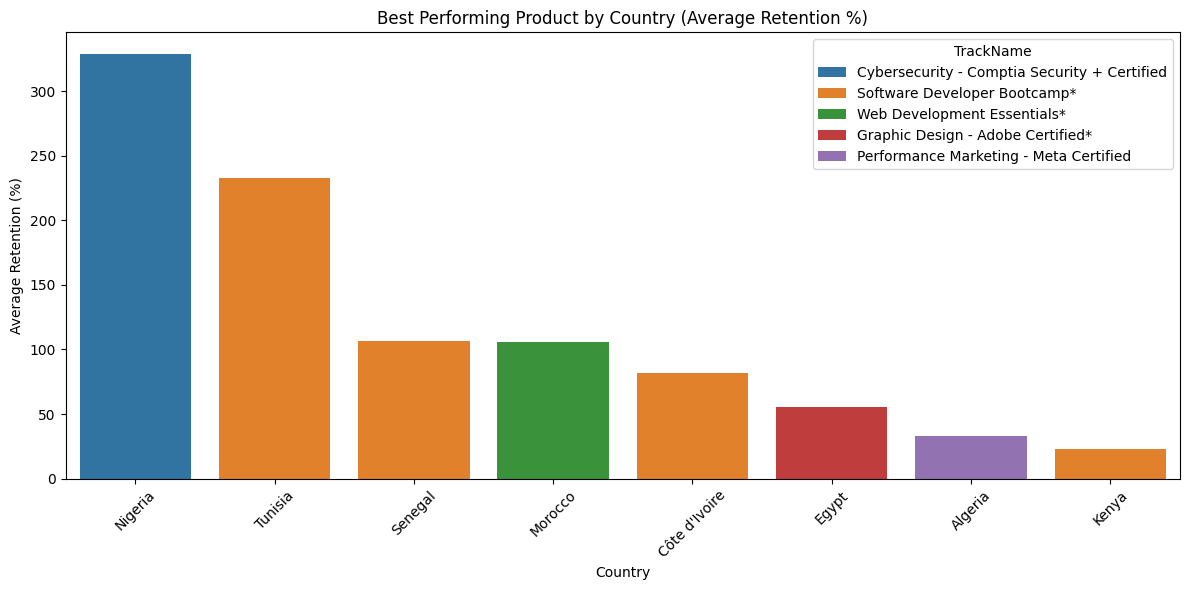

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=best_products, x='Country', y='AverageRetention', hue='TrackName', dodge=False)
plt.title('Best Performing Product by Country (Average Retention %)')
plt.ylabel('Average Retention (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='TrackName')
plt.tight_layout()
plt.show()


* **group by product and age**

In [54]:
grouped_pa = (
    df_cleaned
    .groupby(['TrackName', 'age_group', 'subscription_start_month', 'cohort_index'], observed=True)
    .agg(n_students=('Student', 'count'))
    .reset_index()
)
cohort_matrix_pa = grouped_pa.pivot_table(
    index=['TrackName', 'age_group'],
    columns='cohort_index',
    values='n_students',
    fill_value=0,
    observed=True
)
cohort_matrix_pa

cohort_index                                                    0    1  \
TrackName                                          age_group             
Advanced digital marketing: E-commerce & SEO       <20        1.0  0.0   
                                                   30-39      1.0  0.0   
Coding With Python                                 <20        2.0  0.0   
Cyber Security Bootcamp: Certified CompTIA Secu... <20        0.0  0.0   
                                                   20-29      0.0  0.0   
...                                                           ...  ...   
Web Development Essentials*                        <20        0.0  1.0   
                                                   20-29      1.0  1.0   
                                                   30-39      0.0  0.0   
                                                   40-49      0.0  0.0   
                                                   60+        0.0  0.0   

cohort_index                                                          2  \
TrackName                                          age_group              
Advanced digital marketing: E-commerce & SEO       <20         0.000000   
                                                   30-39       0.000000   
Coding With Python                                 <20         0.000000   
Cyber Security Bootcamp: Certified CompTIA Secu... <20         0.000000   
                                                   20-29       0.000000   
...                                                                 ...   
Web Development Essentials*                        <20        11.285714   
                                                   20-29      17.142857   
                                                   30-39       8.800000   
                                                   40-49       3.000000   
                                                   60+         1.000000   

cohort_index                                                      3    4    5  \
TrackName                                          age_group                    
Advanced digital marketing: E-commerce & SEO       <20         0.00  0.0  0.0   
                                                   30-39       0.00  0.0  0.0   
Coding With Python                                 <20         0.00  0.0  0.0   
Cyber Security Bootcamp: Certified CompTIA Secu... <20         0.00  0.0  1.0   
                                                   20-29       0.00  0.0  3.0   
...                                                             ...  ...  ...   
Web Development Essentials*                        <20        12.75  0.0  0.0   
                                                   20-29      20.00  0.0  0.0   
                                                   30-39       4.00  0.0  0.0   
                                                   40-49       1.25  0.0  0.0   
                                                   60+         0.00  0.0  0.0   

cohort_index                                                    6    7    9  
TrackName                                          age_group                 
Advanced digital marketing: E-commerce & SEO       <20        0.0  0.0  0.0  
                                                   30-39      0.0  0.0  0.0  
Coding With Python                                 <20        0.0  0.0  0.0  
Cyber Security Bootcamp: Certified CompTIA Secu... <20        0.0  0.0  0.0  
                                                   20-29      0.0  0.0  0.0  
...                                                           ...  ...  ...  
Web Development Essentials*                        <20        0.0  0.0  0.0  
                                                   20-29      0.0  0.0  0.0  
                                                   30-39      0.0  0.0  0.0  
                                                   40-49      0.0  0.0  0.0  
                                                   60+        0.0  0.0 

In [55]:
retention_matrix_pa = {}

for index in cohort_matrix_pa.index:
    row = cohort_matrix_pa.loc[index]
    first_non_zero_index = row[row > 0].index.min()
    if pd.isna(first_non_zero_index):
        continue
    shifted_row = row.loc[first_non_zero_index:]
    base = shifted_row.iloc[0]
    retention = (shifted_row / base) * 100
    retention_matrix_pa[index] = retention

retention_matrix_pa = pd.DataFrame(retention_matrix_pa).T
retention_matrix_pa.fillna(0, inplace=True)
retention_matrix_pa.index = pd.MultiIndex.from_tuples(retention_matrix_pa.index, names=['TrackName', 'age_group'])
retention_matrix_pa.columns = retention_matrix_pa.columns.astype(int)
retention_matrix_pa = retention_matrix_pa.sort_index()

retention_matrix_pa

cohort_index                                                      0      1  \
TrackName                                          age_group                 
Advanced digital marketing: E-commerce & SEO       30-39      100.0    0.0   
                                                   <20        100.0    0.0   
Coding With Python                                 <20        100.0    0.0   
Cyber Security Bootcamp: Certified CompTIA Secu... 20-29        0.0    0.0   
                                                   <20          0.0    0.0   
...                                                             ...    ...   
Web Development Essentials*                        20-29      100.0  100.0   
                                                   30-39        0.0    0.0   
                                                   40-49        0.0    0.0   
                                                   60+          0.0    0.0   
                                                   <20          0.0  100.0   

cohort_index                                                            2  \
TrackName                                          age_group                
Advanced digital marketing: E-commerce & SEO       30-39         0.000000   
                                                   <20           0.000000   
Coding With Python                                 <20           0.000000   
Cyber Security Bootcamp: Certified CompTIA Secu... 20-29         0.000000   
                                                   <20           0.000000   
...                                                                   ...   
Web Development Essentials*                        20-29      1714.285714   
                                                   30-39       100.000000   
                                                   40-49       100.000000   
                                                   60+         100.000000   
                                                   <20        1128.571429   

cohort_index                                                            3  \
TrackName                                          age_group                
Advanced digital marketing: E-commerce & SEO       30-39         0.000000   
                                                   <20           0.000000   
Coding With Python                                 <20           0.000000   
Cyber Security Bootcamp: Certified CompTIA Secu... 20-29         0.000000   
                                                   <20           0.000000   
...                                                                   ...   
Web Development Essentials*                        20-29      2000.000000   
                                                   30-39        45.454545   
                                                   40-49        41.666667   
                                                   60+           0.000000   
                                                   <20        1275.000000   

cohort_index                                                    4      5    6  \
TrackName                                          age_group                    
Advanced digital marketing: E-commerce & SEO       30-39      0.0    0.0  0.0   
                                                   <20        0.0    0.0  0.0   
Coding With Python                                 <20        0.0    0.0  0.0   
Cyber Security Bootcamp: Certified CompTIA Secu... 20-29      0.0  100.0  0.0   
                                                   <20        0.0  100.0  0.0   
...                                                           ...    ...  ...   
Web Development Essentials*                        20-29      0.0    0.0  0.0   
                                                   30-39      0.0    0.0  0.0   
                                                   40-49      0.0    0.0  0.0   
                                                   60+        0.0    0.0  0.0   
         

BEST PRODUCT PER AGE GROUP

In [56]:
avg_retention_pa = retention_matrix_pa.mean(axis=1).reset_index()
avg_retention_pa.columns = ['TrackName', 'age_group', 'AverageRetention']

best_products_per_age = avg_retention_pa.loc[
    avg_retention_pa.groupby('age_group')['AverageRetention'].idxmax()
].sort_values(by='AverageRetention', ascending=False)

print("Best Performing Product for Each Age Group:")
print(best_products_per_age)


Best Performing Product for Each Age Group:
                                          TrackName age_group  \
130                     Web Development Essentials*     20-29   
134                     Web Development Essentials*       <20   
16   Data Analytics - Microsoft Power BI Certified*     30-39   
12     Cybersecurity - Comptia Security + Certified     40-49   
86                               Python Essentials*     50-59   
19   Data Analytics - Microsoft Power BI Certified*       60+   

     AverageRetention  
130        434.920635  
134        278.174603  
16         144.444444  
12          70.370370  
86          33.333333  
19          11.111111  


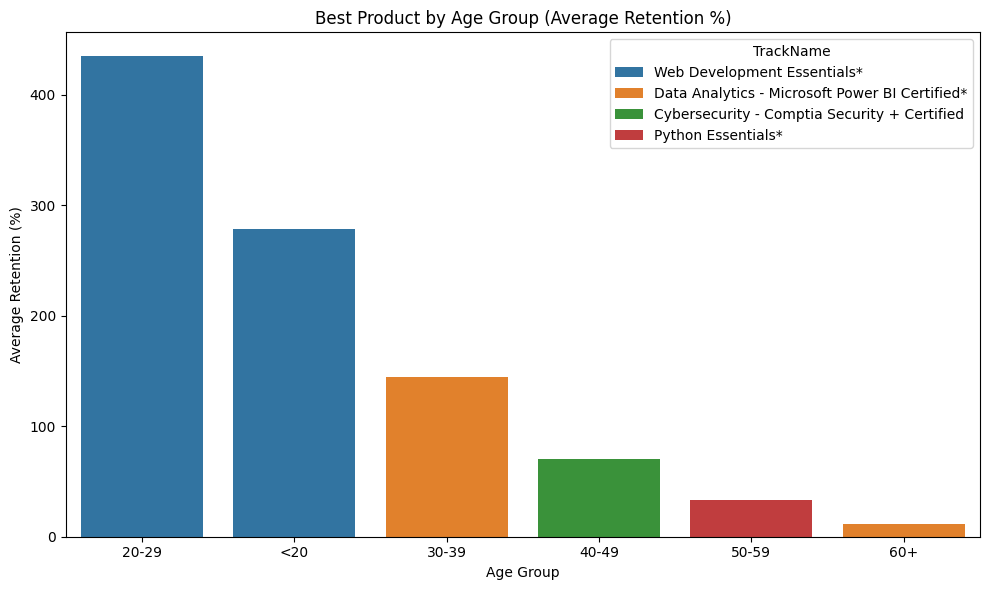

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_products_per_age, x='age_group', y='AverageRetention', hue='TrackName', dodge=False)
plt.title('Best Product by Age Group (Average Retention %)')
plt.xlabel('Age Group')
plt.ylabel('Average Retention (%)')
plt.legend(title='TrackName')
plt.tight_layout()
plt.show()


# **III. Load data**



1.   Save cleaned data to csv


In [61]:
# Final OLAP dataset
olap_df = df_cleaned[[
    'Student',
    'Country',
    'TrackName',
    'SubscriptionStartDate',
    'SubscriptionEndDate',
    'subscription_start_month',
    'subscription_end_month',
    'age_at_subscription',
    'age_group',
    'cohort_index'
]]


In [64]:
from google.colab import files
olap_df.to_csv('cleaned_dataset.csv', index=False)
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



2.   Save to bigquerry



* saving cleaned data set

In [65]:
!pip install --upgrade google-cloud-bigquery pandas-gbq --quiet

In [66]:
from google.colab import auth
auth.authenticate_user()
print("✅ Authenticated!")

✅ Authenticated!


In [67]:
from pandas_gbq import to_gbq

# Replace if you chose a different dataset name
project_id = "olpdataset"
dataset_table = "olap_data.cleaned_subscription_data"  # dataset.table

# Upload the dataframe
to_gbq(olap_df, dataset_table, project_id=project_id, if_exists='replace')

print("✅ Data uploaded to BigQuery!")


/usr/local/lib/python3.11/dist-packages/pandas_gbq/schema/pandas_to_bigquery.py:157: UserWarning: Could not determine the type of columns: subscription_start_month, subscription_end_month
  warnings.warn(msg)
100%|██████████| 1/1 [00:00<00:00, 1678.39it/s]

✅ Data uploaded to BigQuery!


* save filtred and normalized data so we can visulize it

In [77]:
upload_df(cohort_pivot,                   "cohort_by_month")
upload_df(new_retention_matrix,               "retention_by_country")
upload_df(retention_matrix_ct,            "retention_by_country_product")
upload_df(retention_matrix_pa,            "retention_by_product_age")


/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):
/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):
100%|██████████| 1/1 [00:00<00:00, 8004.40it/s]
/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):


✅ Uploaded cohort_by_month


100%|██████████| 1/1 [00:00<00:00, 2124.77it/s]
/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):


✅ Uploaded retention_by_country


100%|██████████| 1/1 [00:00<00:00, 8192.00it/s]
/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):


✅ Uploaded retention_by_country_product


100%|██████████| 1/1 [00:00<00:00, 3167.90it/s]

✅ Uploaded retention_by_product_age


In [79]:
upload_df(subscription_churn,                   "churn_matrix")


/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):
100%|██████████| 1/1 [00:00<00:00, 8830.11it/s]

✅ Uploaded churn_matrix


In [78]:
upload_df(retention_matrix_product,                   "retention_by_product")
upload_df(retention_matrix_age,                   "retention_by_age")


/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):
100%|██████████| 1/1 [00:00<00:00, 6096.37it/s]
/tmp/ipython-input-72-2017607842.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_flat[col]):


✅ Uploaded retention_by_product


100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]

✅ Uploaded retention_by_age


# **IV Visualize on looker studio**

[Looker studio](https://lookerstudio.google.com/reporting/6feaeb65-fc8c-4978-b952-f789cf271bec)